In [1]:
# Preliminaries needed for Python and to run R within a Python notebook
import rpy2.rinterface
%load_ext rpy2.ipython 

## $2^4$ Factorial Example

Here we consider the credit card example in which the influence of annual fee ($x_1$), account opening fee ($x_2$), initial interest rate ($x_3$) and long term interest rate ($x_4$) on account activation. Each of these factors was investigated at 2 levels, thus giving rise to $2^4=16$ experimental conditions. We analysis the results of this experiment with a logistic regression model.

### In R

In [3]:
%%R
## Load in the data
setwd("/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 6/")
credit <- read.csv(file = "creditcard_example.csv", header = T)

In [7]:
%%R
## Fit a full model with all main effects and interaction terms
model <- glm(y ~ x1 * x2 * x3 * x4, family = binomial(link = "logit"), data = credit)
summary(model)


Call:
glm(formula = y ~ x1 * x2 * x3 * x4, family = binomial(link = "logit"), 
    data = credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2625  -0.2229  -0.2154  -0.2024   2.8560  

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.739697   0.019342 -193.347  < 2e-16 ***
x1           0.080845   0.019342    4.180 2.92e-05 ***
x2          -0.106211   0.019342   -5.491 3.99e-08 ***
x3           0.058248   0.019342    3.011  0.00260 ** 
x4          -0.108086   0.019342   -5.588 2.29e-08 ***
x1:x2       -0.055164   0.019342   -2.852  0.00434 ** 
x1:x3       -0.004794   0.019342   -0.248  0.80426    
x2:x3       -0.006967   0.019342   -0.360  0.71868    
x1:x4       -0.013178   0.019342   -0.681  0.49566    
x2:x4        0.010625   0.019342    0.549  0.58280    
x3:x4        0.038079   0.019342    1.969  0.04899 *  
x1:x2:x3    -0.009646   0.019342   -0.499  0.61799    
x1:x2:x4     0.010629   0.019342    0.550  0.58265    
x1

In [11]:
%%R
## Fit a reduced model with just the main effects and interactions that appear to be significant
model_red <- glm(y ~ x1 + x2 + x3 + x4 + x1:x2 + x3:x4, family = binomial(link = "logit"), data = credit)
summary(model_red)


Call:
glm(formula = y ~ x1 + x2 + x3 + x4 + x1:x2 + x3:x4, family = binomial(link = "logit"), 
    data = credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2609  -0.2234  -0.2163  -0.2018   2.8635  

Coefficients:
            Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.73961    0.01934 -193.316  < 2e-16 ***
x1           0.08214    0.01920    4.279 1.88e-05 ***
x2          -0.10834    0.01920   -5.644 1.66e-08 ***
x3           0.05886    0.01916    3.072  0.00212 ** 
x4          -0.11068    0.01916   -5.777 7.61e-09 ***
x1:x2       -0.05706    0.01920   -2.972  0.00296 ** 
x3:x4        0.04051    0.01916    2.115  0.03447 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26854  on 119999  degrees of freedom
Residual deviance: 26744  on 119993  degrees of freedom
AIC: 26758

Number of Fisher Scoring iterations: 6



In [17]:
%%R
## Are the full and reduced models significantly different?
a <- anova(model_red, model)
pval <- pchisq(q = a$Deviance[2], df = a$Df[2], lower.tail = F)
print(paste("The p-value is : ",  round(pval, 4), sep = ""))

[1] "The p-value is : 0.9672"


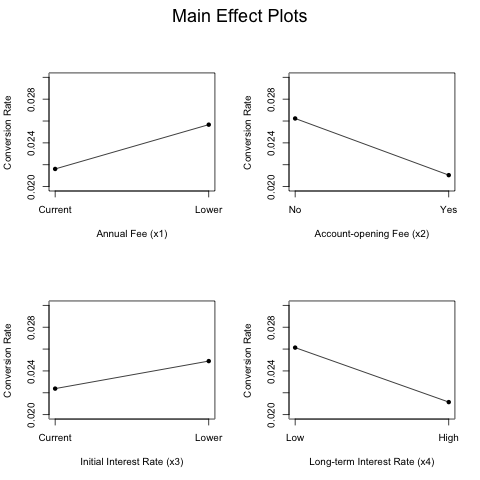

In [27]:
%%R
## Main Effects
me_x1 <- aggregate(credit$y, by = list(credit$x1), FUN = mean)$x
me_x2 <- aggregate(credit$y, by = list(credit$x2), FUN = mean)$x
me_x3 <- aggregate(credit$y, by = list(credit$x3), FUN = mean)$x
me_x4 <- aggregate(credit$y, by = list(credit$x4), FUN = mean)$x

par(mfrow=c(2,2), oma = c(0,0,2,0)) 

plot(x = c(-1,1), y = me_x1, ylab = "Conversion Rate", xlab = "Annual Fee (x1)", type = "l", xaxt = "n", ylim = c(0.02, 0.03))
points(x = c(-1,1), y = me_x1, pch = 16)
axis(side = 1, at = c(-1,1), labels = c("Current", "Lower"))

plot(x = c(-1,1), y = me_x2, ylab = "Conversion Rate", xlab = "Account-opening Fee (x2)", type = "l", xaxt = "n", ylim = c(0.02, 0.03))
points(x = c(-1,1), y = me_x2, pch = 16)
axis(side = 1, at = c(-1,1), labels = c("No", "Yes"))

plot(x = c(-1,1), y = me_x3, ylab = "Conversion Rate", xlab = "Initial Interest Rate (x3)", type = "l", xaxt = "n", ylim = c(0.02, 0.03))
points(x = c(-1,1), y = me_x3, pch = 16)
axis(side = 1, at = c(-1,1), labels = c("Current", "Lower"))

plot(x = c(-1,1), y = me_x4, ylab = "Conversion Rate", xlab = "Long-term Interest Rate (x4)", type = "l", xaxt = "n", ylim = c(0.02, 0.03))
points(x = c(-1,1), y = me_x4, pch = 16)
axis(side = 1, at = c(-1,1), labels = c("Low", "High"))
mtext("Main Effect Plots", outer = TRUE, cex = 1.5)


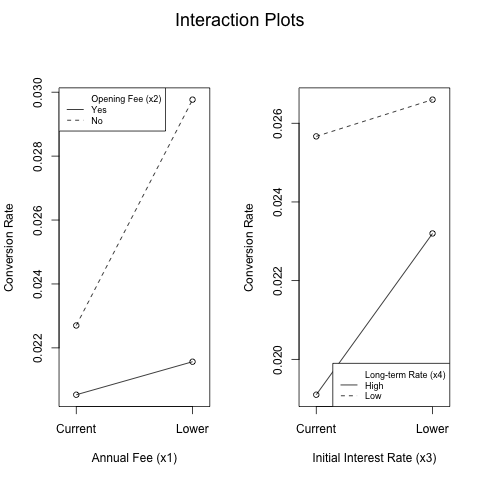

In [31]:
%%R
## Interactions Effects
x1 <- credit$x1
x2 <- credit$x2
x3 <- credit$x3
x4 <- credit$x4
y <- credit$y
par(mfrow=c(1,2), oma = c(0,0,2,0))
# par(mfrow=c(1,2), oma = c(0,0,0,0))
interaction.plot(x1, x2, y, ylab = "Conversion Rate", xlab = "Annual Fee (x1)", main = "", legend = F, xaxt = "n", data = data)
points(x = c(1,1), y = c(mean(credit[credit$x1==-1 & credit$x2==-1,]$y), mean(credit[credit$x1==-1 & credit$x2==1,]$y)), pch = 1)
points(x = c(2,2), y = c(mean(credit[credit$x1==1 & credit$x2==-1,]$y), mean(credit[credit$x1==1 & credit$x2==1,]$y)), pch = 1)
axis(side = 1, at = c(1,2), labels = c("Current", "Lower"))
legend("topleft", legend = c("Opening Fee (x2)","Yes", "No"), lty = c(1,1,2), col=c("white", "black", "black"), cex = 0.75)
interaction.plot(x3, x4, y, ylab = "Conversion Rate", xlab = "Initial Interest Rate (x3)", main = "", legend = F, xaxt = "n")
points(x = c(1,1), y = c(mean(credit[credit$x3==-1 & credit$x4==-1,]$y), mean(credit[credit$x3==-1 & credit$x4==1,]$y)), pch = 1)
points(x = c(2,2), y = c(mean(credit[credit$x3==1 & credit$x4==-1,]$y), mean(credit[credit$x3==1 & credit$x4==1,]$y)), pch = 1)
axis(side = 1, at = c(1,2), labels = c("Current", "Lower"))
legend("bottomright", legend = c("Long-term Rate (x4)","High", "Low"), lty = c(1,1,2), col=c("white", "black", "black"), cex = 0.75)
mtext("Interaction Plots", outer = TRUE, cex = 1.5)

In [39]:
%%R
## Find the best condition
rates <- aggregate(credit$y, by = list(credit$Cond), FUN = mean)
rates[order(-rates$x),]

   Group.1          x
6        6 0.03386667
2        2 0.03360000
14      14 0.02920000
5        5 0.02493333
1        1 0.02453333
8        8 0.02440000
7        7 0.02320000
4        4 0.02293333
13      13 0.02293333
10      10 0.02240000
3        3 0.02160000
15      15 0.02040000
16      16 0.02026667
12      12 0.01866667
9        9 0.01840000
11      11 0.01693333


In [37]:
%%R
## Conditions 2, 6, 14 all look good
cond6 <- sum(credit[credit$Cond == 6, ]$y)
cond2 <- sum(credit[credit$Cond == 2, ]$y)
cond14 <- sum(credit[credit$Cond == 14, ]$y)
prop.test(x = c(cond6, cond2, cond14), n = rep(7500, 3))


	3-sample test for equality of proportions without continuity
	correction

data:  c(cond6, cond2, cond14) out of rep(7500, 3)
X-squared = 3.3037, df = 2, p-value = 0.1917
alternative hypothesis: two.sided
sample estimates:
    prop 1     prop 2     prop 3 
0.03386667 0.03360000 0.02920000 



### In Python

In [83]:
## Import necessary libraries and load the data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.factorplots as smfp
import scipy.stats as sp

os.chdir("/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 6")
credit = pd.read_csv("creditcard_example.csv")

In [59]:
## Fit a full model with all main effects and interaction terms
model = smf.Logit.from_formula('y ~ x1 * x2 * x3 * x4', data = credit).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.111420
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119984
Method:                           MLE   Df Model:                           15
Date:                Tue, 09 Oct 2018   Pseudo R-squ.:                0.004214
Time:                        17:01:20   Log-Likelihood:                -13370.
converged:                       True   LL-Null:                       -13427.
                                        LLR p-value:                 3.962e-17
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -3.7397      0.019   -193.337      0.000        -3.778    -3.702
x1              0.0808      0.019      4.180      0.000         0.043     0.119
x2             -0.1062      0.019     -5.491      0.000        -0.144    -0.068
x1:x2          -0.0552      0.019     -2.852      0.004        -0.093    -0.017
x3              0.0582      0.019      3.011      0.003         0.020     0.096
x1:x3          -0.0048      0.019     -0.248      0.804        -0.043     0.033
x2:x3          -0.0070      0.019     -0.360      0.719        -0.045     0.031
x1:x2:x3       -0.0096      0.019     -0.499      0.618        -0.048     0.028
x4             -0.1081      0.019     -5.588      0.000        -0.146    -0.070
x1:x4          -0.0132      0.019     -0.681      0.496        -0.051     0.025
x2:x4           0.0106      0.019      0.549      0.583        -0.027     0.049
x1:x2:x4        0.0106      0.019      0.549      0.583        -0.027     0.049
x3:x4           0.0381      0.019      1.969      0.049         0.000     0.076
x1:x3:x4       -0.0025      0.019     -0.131      0.895        -0.040     0.035
x2:x3:x4       -0.0209      0.019     -1.083      0.279        -0.059     0.017
x1:x2:x3:x4    -0.0095      0.019     -0.491      0.623        -0.047     0.028
===============================================================================
"""

In [60]:
## Fit a reduced model with just the main effects and interactions that appear to be significant
model_red = smf.Logit.from_formula('y ~ x1 + x2 + x3 + x4 + x1:x2 + x3:x4', data = credit).fit()
model_red.summary()

Optimization terminated successfully.
         Current function value: 0.111433
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119993
Method:                           MLE   Df Model:                            6
Date:                Tue, 09 Oct 2018   Pseudo R-squ.:                0.004105
Time:                        17:01:50   Log-Likelihood:                -13372.
converged:                       True   LL-Null:                       -13427.
                                        LLR p-value:                 1.811e-21
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.7396      0.019   -193.306      0.000        -3.778    -3.702
x1             0.0821      0.019      4.279      0.000         0.045     0.120
x2            -0.1083      0.019     -5.644      0.000        -0.146    -0.071
x3             0.0589      0.019      3.072      0.002         0.021     0.096
x4            -0.1107      0.019     -5.777      0.000        -0.148    -0.073
x1:x2         -0.0571      0.019     -2.972      0.003        -0.095    -0.019
x3:x4          0.0405      0.019      2.114      0.034         0.003     0.078
==============================================================================
"""

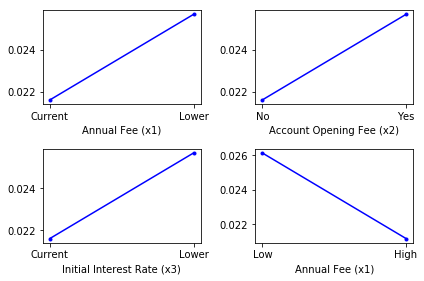

In [71]:
## Frequency Main Effect Plots
plt.subplot(2,2,1)
me_x1 = credit.groupby('x1')['y'].agg('mean')
plt.plot(me_x1, color = "blue", marker = ".")
plt.xlabel("Annual Fee (x1)")
plt.xticks([-1, 1], ['Current', 'Lower'])

plt.subplot(2,2,2)
me_x2 = credit.groupby('x2')['y'].agg('mean')
plt.plot(me_x1, color = "blue", marker = ".")
plt.xlabel("Account Opening Fee (x2)")
plt.xticks([-1, 1], ['No', 'Yes'])

plt.subplot(2,2,3)
me_x3 = credit.groupby('x3')['y'].agg('mean')
plt.plot(me_x1, color = "blue", marker = ".")
plt.xlabel("Initial Interest Rate (x3)")
plt.xticks([-1, 1], ['Current', 'Lower'])

plt.subplot(2,2,4)
me_x4 = credit.groupby('x4')['y'].agg('mean')
plt.plot(me_x4, color = "blue", marker = ".")
plt.xlabel("Annual Fee (x1)")
plt.xticks([-1, 1], ['Low', 'High'])

plt.tight_layout()
plt.show()

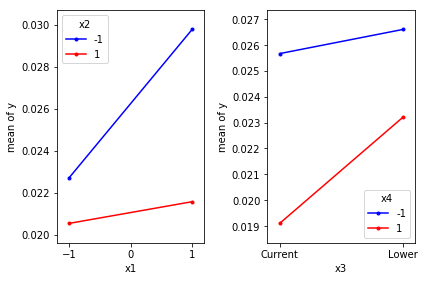

In [73]:
## Interaction Effects
## Interaction Plots
fig, (ax, ax2) = plt.subplots(1,2)

ieplt1 = smfp.interaction_plot(x = credit['x1'], trace = credit['x2'], response = credit['y'], colors = ['blue', 'red'], ax = ax)
plt.xticks([-1,1], ['Current', 'Lower'])

ieplt2 = smfp.interaction_plot(x = credit['x3'], trace = credit['x4'], response = credit['y'], colors = ['blue', 'red'], ax = ax2)
plt.xticks([-1,1], ['Current', 'Lower'])

plt.tight_layout()
plt.show()

In [78]:
## Find the best condition
rates = credit.groupby('Cond')['y'].agg('mean')
rates.sort_values()

Cond
11    0.016933
9     0.018400
12    0.018667
16    0.020267
15    0.020400
3     0.021600
10    0.022400
4     0.022933
13    0.022933
7     0.023200
8     0.024400
1     0.024533
5     0.024933
14    0.029200
2     0.033600
6     0.033867
Name: y, dtype: float64

In [86]:
## Conditions 2, 6, 14 all look good
cond6 = np.sum(credit.loc[credit['Cond'] == 6]['y'])
cond2 = np.sum(credit.loc[credit['Cond'] == 2]['y'])
cond14 = np.sum(credit.loc[credit['Cond'] == 14]['y'])

t, p, df, exp = sp.chi2_contingency([[cond6, cond2, cond14], [7500-cond6, 7500-cond2, 7500-cond14]])
print("Test statistic =", t, ", df =", df, ", p-value =", p)

Test statistic = 3.30369373293 , df = 2 , p-value = 0.191695545417
